<a href="https://colab.research.google.com/github/ItaloAndress/ItaloAndress/blob/main/Informe%20py%20estadistica%20descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###TAREA_1 = INGENIERÍA PARA EL PROCESAMIENTO MASIVO DE DATOS
### FECHA DE ENTREGA 16/09/2024 (PUNTUACIÓN 15%)
### REALIZAR UN INFORME USANDO PYSPARK DE ESTADISTICA DESCRIPTIVA

In [1]:
!pip install pyspark
# El comando '!pip install pyspark' se utiliza para instalar la librería PySpark en el entorno de Python.
# '!pip' indica que estamos ejecutando un comando de sistema desde un entorno de Jupyter Notebook o similar.
# 'install pyspark' es el comando que le dice a pip (el gestor de paquetes de Python) que instale la librería PySpark.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=9c7beb6e954101b7fe3726ad65124ec03b6278891661c787b93c09b7677c61bc
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
# librerias importadas
# 'as' se usa como apodo y sirve para acortar la el codigo

In [30]:
from google.colab import files
uploaded = files.upload()
# Este código crea una sesión de Spark, lee un archivo CSV, genera un DataFrame (df), y luego calcula y muestra la media y la desviación estándar de la duración de las canciones en el archivo.

Saving WorldHits.csv to WorldHits (3).csv


In [38]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, stddev
# librerias importadas

spark = SparkSession.builder.appName("EstadisticaDescriptiva").getOrCreate()
df = spark.read.csv("WorldHits.csv", header=True, inferSchema=True)
# se crea una sesión de spark, esto es necesario para trabajar con Pyspark

df.select(mean("Duration").alias("Media"), stddev("Duration").alias("Desviación Estándar")).show()
# Seleccionamos las columnas calculadas de la media y la desviación estándar de la columna "Duration".
# 'mean("Duration")' calcula la media de la columna "Duration".
# 'stddev("Duration")' calcula la desviación estándar de la columna "Duration".
# 'alias("Media")' y 'alias("Desviación Estándar")' renombra las columnas resultantes para que sean más legibles.


+------------------+-------------------+
|             Media|Desviación Estándar|
+------------------+-------------------+
|333706.15030674846| 268048.55478058814|
+------------------+-------------------+



In [35]:
from pyspark.sql.functions import expr
# libreria importada

df.approxQuantile("Duration", [0.5], 0.01)
# Calculamos la mediana (percentil 50) de la columna "Duration" usando approxQuantile.
# 'approxQuantile' es una función que calcula los percentiles aproximados de una columna.
# El primer argumento es el nombre de la columna ("Duration").
# El segundo argumento es una lista de percentiles que queremos calcular ([0.5] para la mediana).
# El tercer argumento es el error relativo permitido (0.01 en este caso).

[262133.0]

In [36]:
percentiles = df.approxQuantile("Duration", [0.25, 0.5, 0.75], 0.01)
print(f"Percentiles: {percentiles}")
# Calculamos los percentiles 25, 50 (mediana) y 75 de la columna "Duration" usando approxQuantile.
# 'approxQuantile' es una función que calcula los percentiles aproximados de una columna.
# El primer argumento es el nombre de la columna ("Duration").
# El segundo argumento es una lista de percentiles que queremos calcular ([0.25, 0.5, 0.75]).
# El tercer argumento es el error relativo permitido (0.01 en este caso).

Percentiles: [211266.0, 262133.0, 345756.0]


In [37]:
from pyspark.sql.functions import corr
# se importa la funcion corr de PyPark
# 'corr' Calcula la correlación de Pearson entre las columnas y la correlación de Pearson mide la relación lineal entre dos variables.

df.select(corr("Duration", "Popularity").alias("Correlación")).show()
# Seleccionamos la correlación entre las columnas "Duration" y "Popularity".
# 'corr' Calcula la correlación de Pearson entre las columnas y la correlación de Pearson mide la relación lineal entre dos variables.

+--------------------+
|         Correlación|
+--------------------+
|-0.13266894322118775|
+--------------------+



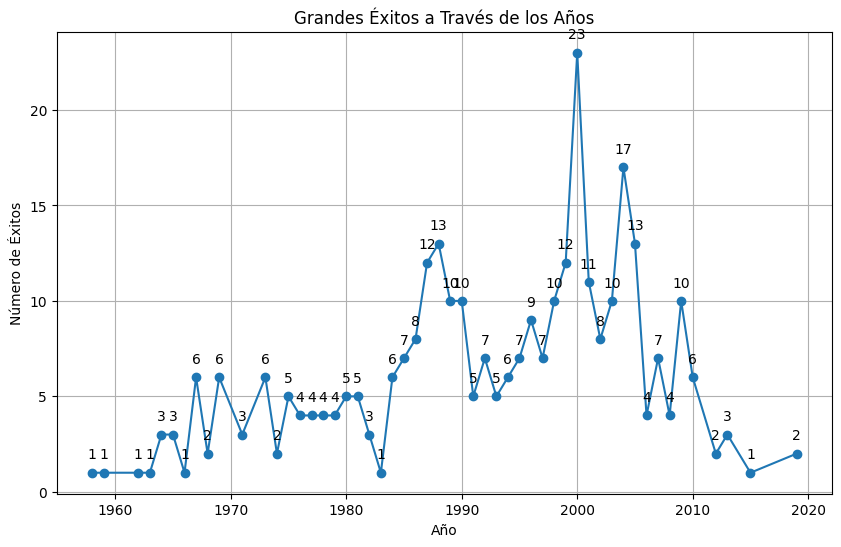

In [40]:
import matplotlib.pyplot as plt
# se importa libreria para creacion de graficos

from pyspark.sql import SparkSession
# Importamos SparkSession de PySpark para crear una sesión de Spar

spark = SparkSession.builder.appName("EstadisticaDescriptiva").getOrCreate()
# Creamos una sesión de Spark

df = spark.read.csv("WorldHits.csv", header=True, inferSchema=True)
# Leemos el archivo CSV en un DataFrame de Spark
# 'header=True' indica que la primera fila del archivo CSV contiene los nombres de las columnas
# 'inferSchema=True' permite a Spark inferir automáticamente el tipo de datos de cada columna

hits_per_year = df.groupBy("Year").count().orderBy("Year").collect()
# Agrupamos por año y contamos el número de éxitos por año
# 'groupBy("Year")' agrupa los datos por la columna "Year"
# 'count()' cuenta el número de registros en cada grupo
# 'orderBy("Year")' ordena los resultados por año
# 'collect()' recoge los resultados en una lista de filas

years = [row["Year"] for row in hits_per_year]
counts = [row["count"] for row in hits_per_year]
# Extraemos los datos para el gráfico
# 'years' contiene los años
# 'counts' contiene el número de éxitos por año

plt.figure(figsize=(10, 6))# Creamos el gráfico, 'plt.figure(figsize=(10, 6))' crea una figura de tamaño 10x6 pulgadas
plt.plot(years, counts, marker='o') ## 'plt.plot(years, counts, marker='o')' dibuja una línea con marcadores en los puntos de datos
plt.title("Grandes Éxitos a Través de los Años") # 'plt.title' establece el título del gráfico
plt.xlabel("Año") # 'plt.xlabel' establece la etiqueta del eje x
plt.ylabel("Número de Éxitos") # 'plt.ylabel' establece la etiqueta del eje y
plt.grid(True) # 'plt.grid(True)' muestra una cuadrícula en el gráfico

for i, txt in enumerate(counts):
    plt.annotate(txt, (years[i], counts[i]), textcoords="offset points", xytext=(0,10), ha='center')
# Agregamos etiquetas en los picos
# 'enumerate(counts)' itera sobre los índices y valores de 'counts'
# 'plt.annotate' agrega una anotación en el gráfico

plt.show()
# Mostramos el gráfico